In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import rc
rc('text',usetex=True)
cmap = matplotlib.cm.get_cmap('Dark2')
colors = cmap(np.linspace(0,1,6))
import glob
from plotting import *
from physics import Disk, Particle
%matplotlib inline

In [2]:
seed = 0
rss = np.random.RandomState(seed)
# 300 particles, disk radius = 1, softening length of 0.05, mass of halo = 0
N, R, c, Mh = 300, 1, 0.05, 0

In [3]:
d = Disk(N,R,c,Mh,rss)
d.init_velocities()

Finished initializing disk with paramters (N,R,c,Mh) = (300,1,0.05,0)
Finished initializing velocities, outermost particle has an orbital period of 0.291


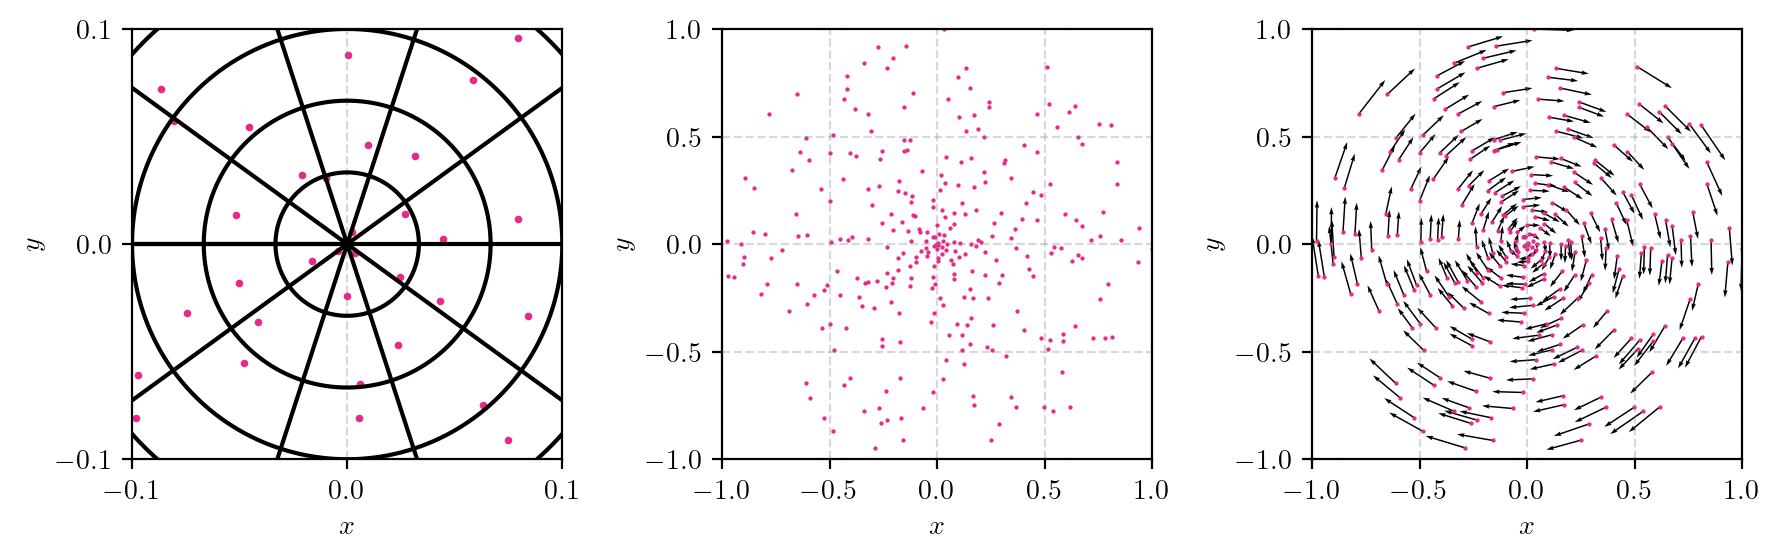

In [4]:
fig = inspect_grid(d)